# Evaluate performance of a neural network using Keras

### Required Packages

We'll start by importing all of the required packages and classes.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers

### Load the data

We will be classifying bank complaints available in the `'Bank_complaints.csv'` file. 

In [2]:
# Import data
df = pd.read_csv('Bank_complaints.csv')

# Inspect data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       60000 non-null  object
 1   Consumer complaint narrative  60000 non-null  object
dtypes: object(2)
memory usage: 937.6+ KB
None


,Product,Consumer complaint narrative
0,Student loan,In XX/XX/XXXX I filled out the Fedlaon applica...
1,Student loan,I am being contacted by a debt collector for p...
2,Student loan,I cosigned XXXX student loans at SallieMae for...
3,Student loan,Navient has sytematically and illegally failed...
4,Student loan,My wife became eligible for XXXX Loan Forgiven...


Our task is to categorize banking complaints into various predefined categories. Preview what these categories are and what percent of the complaints each accounts for. 

In [3]:
df['Product'].value_counts(normalize=True)

Product
Student loan                   0.190067
Credit card                    0.159000
Consumer Loan                  0.157900
Mortgage                       0.138867
Bank account or service        0.138483
Credit reporting               0.114400
Checking or savings account    0.101283
Name: proportion, dtype: float64

### Preprocessing

Before we build our neural network, we need to do several preprocessing steps. First, we will create word vector counts (a bag of words type representation) of our complaints text. Next, we will change the category labels to integers. Finally, we will perform our usual train-test split before building and training our neural network using Keras!

### One-hot encoding of the complaints

Our first step again is to transform our textual data into a numerical representation. We'll use the `Tokenizer()` class from the `preprocessing.text` sub-module of the Keras package.   

Using NLTK, this will transform our text complaints into word vectors.We'll only keep the 2,000 most common words and use one-hot encoding.

In [4]:
# As a quick preliminary, briefly review the docstring for keras.preprocessing.text.Tokenizer
Tokenizer?

In [5]:
# ⏰ This cell may take about thirty seconds to run

# Raw text complaints
complaints = df['Consumer complaint narrative'] 

# Initialize a tokenizer 
tokenizer = Tokenizer(num_words=2000) 

# Fit it to the complaints
tokenizer.fit_on_texts(complaints) 

# Generate sequences
sequences = tokenizer.texts_to_sequences(complaints) 
print('sequences type:', type(sequences))

# Similar to sequences, but returns a numpy array
one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary') 
print('one_hot_results type:', type(one_hot_results))

# Useful if we wish to decode (more explanation below)
word_index = tokenizer.word_index 

# Tokens are the number of unique words across the corpus
print('Found %s unique tokens.' % len(word_index)) 

# Our coded data
print('Dimensions of our coded results:', np.shape(one_hot_results)) 

sequences type: <class 'list'>
one_hot_results type: <class 'numpy.ndarray'>
Found 50110 unique tokens.
Dimensions of our coded results: (60000, 2000)


### Decoding Word Vectors 

As a note, you can also decode these vectorized representations of the reviews. The `word_index` variable, defined above, stores the mapping from the label number to the actual word. Somewhat tediously, we can turn this dictionary inside out and map it back to our word vectors, giving us roughly the original complaint back. (As you'll see, the text won't be identical as we limited ourselves to top 2000 words.)

### Python Review / Mini Challenge

While a bit tangential to our main topic of interest, we need to reverse our current dictionary `word_index` which maps words from our corpus to integers. In decoding our `one_hot_results`, we will need to create a dictionary of these integers to the original words. Below, take the `word_index` dictionary object and change the orientation so that the values are keys and the keys values. In other words, you are transforming something of the form {A:1, B:2, C:3} to {1:A, 2:B, 3:C}. 

In [6]:
reverse_index = dict([(value, key) for (key, value) in word_index.items()])

### Back to Decoding Our Word Vectors...

In [7]:
comment_idx_to_preview = 19
print('Original complaint text:')
print(complaints[comment_idx_to_preview])
print('\n\n')

#The reverse_index cell block above must be complete in order for this cell block to successively execute.
decoded_review = ' '.join([reverse_index.get(i) for i in sequences[comment_idx_to_preview]])
print('Decoded review from Tokenizer:')
print(decoded_review)

Original complaint text:
I have already filed several complaints about AES/PHEAA. I was notified by a XXXX XXXX let @ XXXX, who pretended to be from your office, he said he was from CFPB. I found out this morning he is n't from your office, but is actually works at XXXX. 

This has wasted weeks of my time. They AES/PHEAA confirmed and admitted ( see attached transcript of XXXX, conversation at XXXX ( XXXX ) with XXXX that proves they verified the loans are not mine ) the student loans they had XXXX, and collected on, and reported negate credit reporting in my name are in fact, not mine. 
They conclued their investigation on XXXX admitting they made a mistake and have my name on soneone elses loans. I these XXXX loans total {$10000.00}, original amount. My XXXX loans I got was total {$3500.00}. We proved by providing AES/PHEAA, this with my original promissary notes I located recently, the XXXX of my college provided AES/PHEAA with their original shoeinf amounts of my XXXX loans which s

### Convert the Products to Numerical Categories

On to step two of our preprocessing: converting our descriptive categories into integers.

In [8]:
product = df['Product']

# Initialize
le = preprocessing.LabelEncoder() 
le.fit(product)
print('Original class labels:')
print(list(le.classes_))
print('\n')
product_cat = le.transform(product)  

# If you wish to retrieve the original descriptive labels post production
# list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) 

print('New product labels:')
print(product_cat)
print('\n')

# Each row will be all zeros except for the category for that observation 
print('One hot labels; 7 binary columns, one for each of the categories.') 
product_onehot = to_categorical(product_cat)
print(product_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(product_onehot))

Original class labels:
['Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Credit card', 'Credit reporting', 'Mortgage', 'Student loan']


New product labels:
[6 6 6 ... 4 4 4]


One hot labels; 7 binary columns, one for each of the categories.
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


One hot labels shape:
(60000, 7)


### Train-test split

Now for our final preprocessing step: the usual train-test split. 

In [9]:
random.seed(123)
test_index = random.sample(range(1,10000), 1500)

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)

label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

print('Test label shape:', np.shape(label_test))
print('Train label shape:', np.shape(label_train))
print('Test shape:', np.shape(test))
print('Train shape:', np.shape(train))

Test label shape: (1500, 7)
Train label shape: (58500, 7)
Test shape: (1500, 2000)
Train shape: (58500, 2000)


### Building the network

Let's build a fully connected (Dense) layer network with relu activation in Keras. You can do this using: `Dense(16, activation='relu')`. 

In this example, use two hidden layers with 50 units in the first layer and 25 in the second, both with a `'relu'` activation function. Because we are dealing with a multiclass problem (classifying the complaints into 7 categories), we use a use a `'softmax'` classifier in order to output 7 class probabilities per case.

In [10]:
# Initialize a sequential model
model = models.Sequential()

# Two layers with relu activation
model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(25, activation='relu'))

# One layer with softmax activation 
model.add(layers.Dense(7, activation='softmax'))

### Compiling the model

Now, compile the model! This time, use `'categorical_crossentropy'` as the loss function and stochastic gradient descent, `'SGD'` as the optimizer. Include the accuracy as a metric.

In [11]:
# Compile the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['acc'])

### Training the model

In the compiler, you'll be passing the optimizer (SGD = stochastic gradient descent), loss function, and metrics. Train the model for 120 epochs in mini-batches of 256 samples.

_Note:_ ⏰ _Your code may take about one to two minutes to run._

In [12]:
# Train the model 
history = model.fit(train,
                    label_train,
                    epochs=120,
                    batch_size=256)

Epoch 1/120
229/229 [==============================] - 1s 4ms/step - loss: 1.9122 - acc: 0.1982
Epoch 2/120
229/229 [==============================] - 1s 3ms/step - loss: 1.7259 - acc: 0.3914
Epoch 3/120
229/229 [==============================] - 1s 3ms/step - loss: 1.3789 - acc: 0.5890
Epoch 4/120
229/229 [==============================] - 1s 4ms/step - loss: 1.0539 - acc: 0.6785
Epoch 5/120
229/229 [==============================] - 1s 4ms/step - loss: 0.8633 - acc: 0.7148
Epoch 6/120
229/229 [==============================] - 1s 5ms/step - loss: 0.7633 - acc: 0.7328
Epoch 7/120
229/229 [==============================] - 1s 4ms/step - loss: 0.7056 - acc: 0.7465
Epoch 8/120
229/229 [==============================] - 1s 4ms/step - loss: 0.6675 - acc: 0.7581
Epoch 9/120
229/229 [==============================] - 1s 4ms/step - loss: 0.6401 - acc: 0.7663
Epoch 10/120
229/229 [==============================] - 1s 4ms/step - loss: 0.6186 - acc: 0.7737
Epoch 11/120
229/229 [=================

Recall that the dictionary `history` has two entries: the loss and the accuracy achieved using the training set.

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

### Plot the results

As you might expect, we'll use our `matplotlib` for graphing. Use the data stored in the `history_dict` above to plot the loss vs epochs and the accuracy vs epochs. 

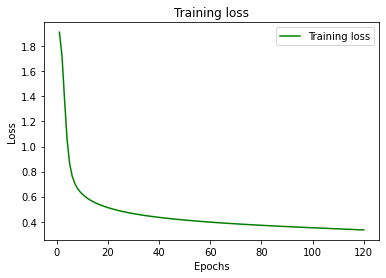

In [14]:
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

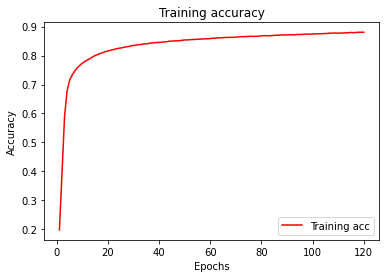

In [15]:
# Plot the training accuracy vs the number of epochs

acc_values = history_dict['acc'] 

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It seems like we could just keep on going and accuracy would go up!

### Make predictions

Finally, it's time to make predictions. Use the relevant method to output (probability) predictions for the test set.

In [16]:
# Output (probability) predictions for the test set 
y_hat_test = model.predict(test) 

47/47 [==============================] - 0s 1ms/step


### Evaluate Performance

Finally, print the loss and accuracy for both the train and test sets of the final trained model.

In [17]:
# Print the loss and accuracy for the training set 
results_train = model.evaluate(train, label_train)
results_train

1829/1829 [==============================] - 2s 1ms/step - loss: 0.3281 - acc: 0.8841


[0.3280838131904602, 0.8841025829315186]

In [18]:
# Print the loss and accuracy for the test set 
results_test = model.evaluate(test, label_test)
results_test

47/47 [==============================] - 0s 2ms/step - loss: 0.2517 - acc: 0.9287


[0.2517300844192505, 0.9286666512489319]

> **We can see that the training set results are really good, and the test set results seem to be even better. In general, this type of result will be rare, as train set results are usually at least a bit better than test set results.**

# Tuning Neural Networks with Regularization

In [19]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [20]:
# Load and preview the dataset
df = pd.read_csv("Bank_complaints.csv")#None
df

,Product,Consumer complaint narrative
0,Student loan,In XX/XX/XXXX I filled out the Fedlaon applica...
1,Student loan,I am being contacted by a debt collector for p...
2,Student loan,I cosigned XXXX student loans at SallieMae for...
3,Student loan,Navient has sytematically and illegally failed...
4,Student loan,My wife became eligible for XXXX Loan Forgiven...
...,...,...
59995,Credit reporting,"In XXXX, I defaulted on a credit card with XXX..."
59996,Credit reporting,I HAVE CALLED TRANSUNION JUST ABOUT EVERY MONT...
59997,Credit reporting,"Hello, there is a 2012 Chapter XXXX Bankruptcy..."
59998,Credit reporting,I had a 2 yr internet contract with XXXX XXXX ...


In [21]:
# Downsample the data
df_sample = df.sample(10000, random_state=123)

# Split the data into X and y
y = df_sample['Product']
X = df_sample['Consumer complaint narrative']

In [22]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1500, random_state=42)

s mentioned in the previous lesson, it is good practice to set aside a validation set, which is then used during hyperparameter tuning. Afterwards, when you have decided upon a final model, the test set can then be used to determine an unbiased perforance of the model. 

Run the cell below to further divide the training data into training and validation sets.

In [23]:
# Split the data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=1000, random_state=42)

- Keep the 2,000 most common words and use one-hot encoding to reformat the complaints into a matrix of vectors 
- Transform the training, validate, and test sets 

In [24]:
# Use one-hot encoding to reformat the complaints into a matrix of vectors 
# Only keep the 2000 most common words 

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final)

X_train_tokens = tokenizer.texts_to_matrix(X_train_final, mode='binary')
X_val_tokens = tokenizer.texts_to_matrix(X_val, mode='binary')
X_test_tokens = tokenizer.texts_to_matrix(X_test, mode='binary')

Similarly, now transform the descriptive product labels to integers labels. After transforming them to integer labels, retransform them into a matrix of binary flags, one for each of the various product labels.  
  
> **Note**: This is similar to your previous work with dummy variables. Each of the various product categories will be its own column, and each observation will be a row. In turn, each of these observation rows will have a 1 in the column associated with it's label, and all other entries for the row will be zero. 

Transform the training, validate, and test sets. 

In [25]:
# Transform the product labels to numerical values
lb = LabelBinarizer()
lb.fit(y_train_final)

y_train_lb = to_categorical(lb.transform(y_train_final))[:, :, 1]
y_val_lb = to_categorical(lb.transform(y_val))[:, :, 1]
y_test_lb = to_categorical(lb.transform(y_test))[:, :, 1]

## A Baseline Model 

Rebuild a fully connected (Dense) layer network:  
- Use 2 hidden layers with 50 units in the first and 25 in the second layer, both with `'relu'` activation functions (since you are dealing with a multiclass problem, classifying the complaints into 7 classes) 
- Use a `'softmax'` activation function for the output layer  

In [26]:
# Build a baseline neural network model using Keras
random.seed(123)
from keras import models
from keras import layers
baseline_model = models.Sequential()
baseline_model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
baseline_model.add(layers.Dense(25, activation='relu'))
baseline_model.add(layers.Dense(7, activation='softmax'))

In [27]:
# Compile the model
baseline_model.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])

In [28]:
# Train the model
baseline_model_val = baseline_model.fit(X_train_tokens, 
                                        y_train_lb, 
                                        epochs=150, 
                                        batch_size=256, 
                                        validation_data=(X_val_tokens, y_val_lb))

Epoch 1/150
30/30 [==============================] - 0s 7ms/step - loss: 1.9594 - acc: 0.1421 - val_loss: 1.9609 - val_acc: 0.1410
Epoch 2/150
30/30 [==============================] - 0s 4ms/step - loss: 1.9431 - acc: 0.1668 - val_loss: 1.9477 - val_acc: 0.1470
Epoch 3/150
30/30 [==============================] - 0s 4ms/step - loss: 1.9297 - acc: 0.1953 - val_loss: 1.9354 - val_acc: 0.1680
Epoch 4/150
30/30 [==============================] - 0s 4ms/step - loss: 1.9157 - acc: 0.2168 - val_loss: 1.9218 - val_acc: 0.1910
Epoch 5/150
30/30 [==============================] - 0s 4ms/step - loss: 1.8996 - acc: 0.2395 - val_loss: 1.9061 - val_acc: 0.2110
Epoch 6/150
30/30 [==============================] - 0s 4ms/step - loss: 1.8805 - acc: 0.2595 - val_loss: 1.8862 - val_acc: 0.2310
Epoch 7/150
30/30 [==============================] - 0s 4ms/step - loss: 1.8576 - acc: 0.2857 - val_loss: 1.8627 - val_acc: 0.2520
Epoch 8/150
30/30 [==============================] - 0s 4ms/step - loss: 1.8304 - a

30/30 [==============================] - 0s 4ms/step - loss: 0.5767 - acc: 0.8024 - val_loss: 0.6896 - val_acc: 0.7410
Epoch 64/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5711 - acc: 0.8037 - val_loss: 0.6878 - val_acc: 0.7380
Epoch 65/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5663 - acc: 0.8060 - val_loss: 0.6856 - val_acc: 0.7440
Epoch 66/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5609 - acc: 0.8065 - val_loss: 0.6853 - val_acc: 0.7370
Epoch 67/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5559 - acc: 0.8108 - val_loss: 0.6783 - val_acc: 0.7470
Epoch 68/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5512 - acc: 0.8104 - val_loss: 0.6805 - val_acc: 0.7420
Epoch 69/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5464 - acc: 0.8124 - val_loss: 0.6801 - val_acc: 0.7420
Epoch 70/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5412 - acc: 0

Epoch 125/150
30/30 [==============================] - 0s 5ms/step - loss: 0.3549 - acc: 0.8911 - val_loss: 0.6427 - val_acc: 0.7540
Epoch 126/150
30/30 [==============================] - 0s 4ms/step - loss: 0.3523 - acc: 0.8899 - val_loss: 0.6444 - val_acc: 0.7550
Epoch 127/150
30/30 [==============================] - 0s 5ms/step - loss: 0.3499 - acc: 0.8921 - val_loss: 0.6425 - val_acc: 0.7540
Epoch 128/150
30/30 [==============================] - 0s 4ms/step - loss: 0.3475 - acc: 0.8932 - val_loss: 0.6443 - val_acc: 0.7430
Epoch 129/150
30/30 [==============================] - 0s 4ms/step - loss: 0.3450 - acc: 0.8945 - val_loss: 0.6442 - val_acc: 0.7570
Epoch 130/150
30/30 [==============================] - 0s 5ms/step - loss: 0.3425 - acc: 0.8941 - val_loss: 0.6470 - val_acc: 0.7520
Epoch 131/150
30/30 [==============================] - 0s 4ms/step - loss: 0.3399 - acc: 0.8968 - val_loss: 0.6448 - val_acc: 0.7500
Epoch 132/150
30/30 [==============================] - 0s 5ms/step - 

### Model Performance

The attribute `.history` (stored as a dictionary) contains four entries now: one per metric that was being monitored during training and validation. Print the keys of this dictionary for confirmation: 

In [29]:
# Access the history attribute and store the dictionary
baseline_model_val_dict = baseline_model_val.history

# Print the keys
baseline_model_val_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Evaluate this model on the training data:

In [31]:
results_train = baseline_model.evaluate(X_train_tokens, y_train_lb)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

235/235 [==============================] - 0s 757us/step - loss: 0.2942 - acc: 0.9131
----------
Training Loss: 0.294 
Training Accuracy: 0.913


Evaluate this model on the test data:

In [32]:
results_test = baseline_model.evaluate(X_test_tokens, y_test_lb)
print('----------')
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

47/47 [==============================] - 0s 904us/step - loss: 0.6176 - acc: 0.7827
----------
Test Loss: 0.618 
Test Accuracy: 0.783


### Plot the Results 

Plot the loss versus the number of epochs. Be sure to include the training and the validation loss in the same plot. 

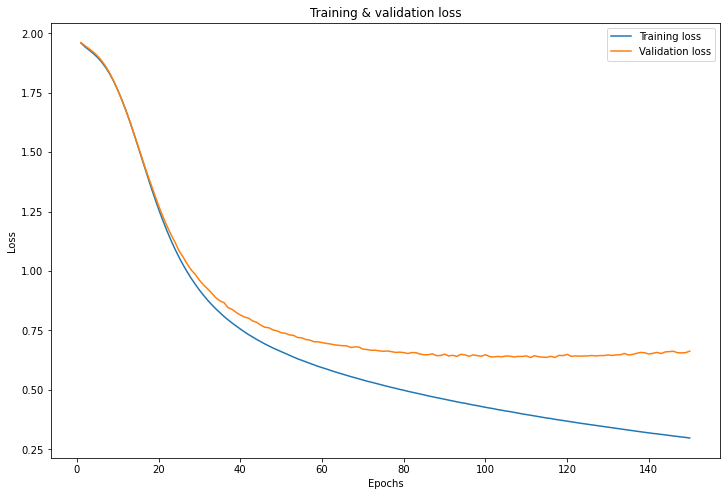

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

loss_values = baseline_model_val_dict['loss']
val_loss_values = baseline_model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
ax.plot(epochs, loss_values, label='Training loss')
ax.plot(epochs, val_loss_values, label='Validation loss')

ax.set_title('Training & validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

Create a second plot comparing training and validation accuracy to the number of epochs.

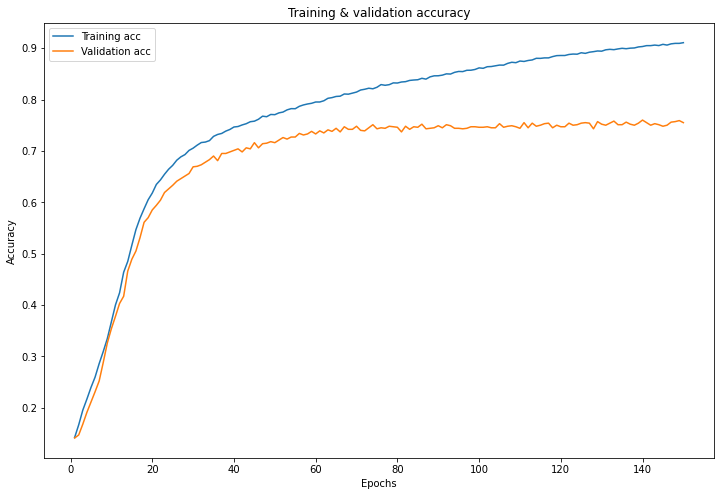

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

acc_values = baseline_model_val_dict['acc'] 
val_acc_values = baseline_model_val_dict['val_acc']

ax.plot(epochs, acc_values, label='Training acc')
ax.plot(epochs, val_acc_values, label='Validation acc')
ax.set_title('Training & validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

Did you notice an interesting pattern here? Although the training accuracy keeps increasing when going through more epochs, and the training loss keeps decreasing, the validation accuracy and loss don't necessarily do the same. After a certain point, validation accuracy keeps swinging, which means that you're probably **overfitting** the model to the training data when you train for many epochs past a certain dropoff point. Let's tackle this now. You will now specify an early stopping point when training your model. 


## Early Stopping

Overfitting neural networks is something you **_want_** to avoid at all costs. However, it's not possible to know in advance how many *epochs* you need to train your model on, and running the model multiple times with varying number of *epochs* maybe helpful, but is a time-consuming process. 

We've defined a model with the same architecture as above. This time specify an early stopping point when training the model. 

In [35]:
random.seed(123)
model_2 = models.Sequential()
model_2.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model_2.add(layers.Dense(25, activation='relu'))
model_2.add(layers.Dense(7, activation='softmax'))

model_2.compile(optimizer='SGD', 
                loss='categorical_crossentropy', 
                metrics=['acc'])

In [36]:
# Import EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

Train `model_2`. Make sure you set the `callbacks` argument to `early_stopping`. 

In [37]:
model_2_val = model_2.fit(X_train_tokens, 
                          y_train_lb, 
                          epochs=150, 
                          callbacks=early_stopping, 
                          batch_size=256, 
                          validation_data=(X_val_tokens, y_val_lb))

Epoch 1/150
30/30 [==============================] - 0s 9ms/step - loss: 1.9594 - acc: 0.1427 - val_loss: 1.9608 - val_acc: 0.1440
Epoch 2/150
30/30 [==============================] - 0s 4ms/step - loss: 1.9430 - acc: 0.1687 - val_loss: 1.9477 - val_acc: 0.1500
Epoch 3/150
30/30 [==============================] - 0s 4ms/step - loss: 1.9295 - acc: 0.1976 - val_loss: 1.9353 - val_acc: 0.1780
Epoch 4/150
30/30 [==============================] - 0s 4ms/step - loss: 1.9154 - acc: 0.2161 - val_loss: 1.9213 - val_acc: 0.1920
Epoch 5/150
30/30 [==============================] - 0s 5ms/step - loss: 1.8992 - acc: 0.2384 - val_loss: 1.9056 - val_acc: 0.2110
Epoch 6/150
30/30 [==============================] - 0s 4ms/step - loss: 1.8798 - acc: 0.2604 - val_loss: 1.8859 - val_acc: 0.2310
Epoch 7/150
30/30 [==============================] - 0s 4ms/step - loss: 1.8569 - acc: 0.2851 - val_loss: 1.8620 - val_acc: 0.2540
Epoch 8/150
30/30 [==============================] - 0s 5ms/step - loss: 1.8296 - a

30/30 [==============================] - 0s 4ms/step - loss: 0.5768 - acc: 0.8017 - val_loss: 0.6875 - val_acc: 0.7400
Epoch 64/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5708 - acc: 0.8039 - val_loss: 0.6872 - val_acc: 0.7440
Epoch 65/150
30/30 [==============================] - 0s 5ms/step - loss: 0.5655 - acc: 0.8072 - val_loss: 0.6834 - val_acc: 0.7410
Epoch 66/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5607 - acc: 0.8079 - val_loss: 0.6887 - val_acc: 0.7360
Epoch 67/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5558 - acc: 0.8075 - val_loss: 0.6800 - val_acc: 0.7460
Epoch 68/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5507 - acc: 0.8112 - val_loss: 0.6768 - val_acc: 0.7450
Epoch 69/150
30/30 [==============================] - 0s 5ms/step - loss: 0.5458 - acc: 0.8132 - val_loss: 0.6735 - val_acc: 0.7480
Epoch 70/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5410 - acc: 0

Load the best (saved) model.

In [38]:
# Load the best (saved) model
from keras.models import load_model
saved_model = load_model('best_model.h5')

Now, use this model to to calculate the training and test accuracy:

In [39]:
results_train = saved_model.evaluate(X_train_tokens, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = saved_model.evaluate(X_test_tokens, y_test_lb)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

235/235 [==============================] - 0s 987us/step - loss: 0.3990 - acc: 0.8760
Training Loss: 0.399 
Training Accuracy: 0.876
----------
47/47 [==============================] - 0s 957us/step - loss: 0.6052 - acc: 0.7847
Test Loss: 0.605 
Test Accuracy: 0.785


Nicely done! Did you notice that the model didn't train for all 150 epochs? You reduced your training time. 

Now, take a look at how regularization techniques can further improve your model performance. 

## L2 Regularization 

First, take a look at L2 regularization. Keras makes L2 regularization easy. Simply add the `kernel_regularizer=keras.regularizers.l2(lambda_coeff)` parameter to any model layer. The `lambda_coeff` parameter determines the strength of the regularization you wish to perform. 

- Use 2 hidden layers with 50 units in the first and 25 in the second layer, both with `'relu'` activation functions 
- Add L2 regularization to both the hidden layers with 0.005 as the `lambda_coeff` 

In [40]:
# Import regularizers
from keras import regularizers
random.seed(123)
L2_model = models.Sequential()

# Add the input and first hidden layer
L2_model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,)))

# Add another hidden layer
L2_model.add(layers.Dense(25, kernel_regularizer=regularizers.l2(0.005), activation='relu'))

# Add an output layer
L2_model.add(layers.Dense(7, activation='softmax'))

# Compile the model
L2_model.compile(optimizer='SGD', 
                 loss='categorical_crossentropy', 
                 metrics=['acc'])

# Train the model 
L2_model_val = L2_model.fit(X_train_tokens, 
                            y_train_lb, 
                            epochs=150, 
                            batch_size=256, 
                            validation_data=(X_val_tokens, y_val_lb))

Epoch 1/150
30/30 [==============================] - 0s 8ms/step - loss: 2.6151 - acc: 0.1428 - val_loss: 2.6147 - val_acc: 0.1450
Epoch 2/150
30/30 [==============================] - 0s 4ms/step - loss: 2.5948 - acc: 0.1687 - val_loss: 2.5973 - val_acc: 0.1470
Epoch 3/150
30/30 [==============================] - 0s 4ms/step - loss: 2.5776 - acc: 0.1947 - val_loss: 2.5814 - val_acc: 0.1740
Epoch 4/150
30/30 [==============================] - 0s 5ms/step - loss: 2.5600 - acc: 0.2175 - val_loss: 2.5642 - val_acc: 0.1960
Epoch 5/150
30/30 [==============================] - 0s 5ms/step - loss: 2.5405 - acc: 0.2409 - val_loss: 2.5447 - val_acc: 0.2120
Epoch 6/150
30/30 [==============================] - 0s 5ms/step - loss: 2.5182 - acc: 0.2608 - val_loss: 2.5222 - val_acc: 0.2320
Epoch 7/150
30/30 [==============================] - 0s 5ms/step - loss: 2.4927 - acc: 0.2849 - val_loss: 2.4954 - val_acc: 0.2560
Epoch 8/150
30/30 [==============================] - 0s 5ms/step - loss: 2.4634 - a

30/30 [==============================] - 0s 4ms/step - loss: 1.1427 - acc: 0.7983 - val_loss: 1.2386 - val_acc: 0.7340
Epoch 64/150
30/30 [==============================] - 0s 5ms/step - loss: 1.1359 - acc: 0.7976 - val_loss: 1.2335 - val_acc: 0.7350
Epoch 65/150
30/30 [==============================] - 0s 4ms/step - loss: 1.1295 - acc: 0.8008 - val_loss: 1.2276 - val_acc: 0.7390
Epoch 66/150
30/30 [==============================] - 0s 5ms/step - loss: 1.1227 - acc: 0.8036 - val_loss: 1.2215 - val_acc: 0.7450
Epoch 67/150
30/30 [==============================] - 0s 5ms/step - loss: 1.1159 - acc: 0.8057 - val_loss: 1.2193 - val_acc: 0.7420
Epoch 68/150
30/30 [==============================] - 0s 4ms/step - loss: 1.1099 - acc: 0.8071 - val_loss: 1.2139 - val_acc: 0.7480
Epoch 69/150
30/30 [==============================] - 0s 5ms/step - loss: 1.1031 - acc: 0.8085 - val_loss: 1.2089 - val_acc: 0.7450
Epoch 70/150
30/30 [==============================] - 0s 4ms/step - loss: 1.0968 - acc: 0

Epoch 125/150
30/30 [==============================] - 0s 5ms/step - loss: 0.8481 - acc: 0.8772 - val_loss: 1.0618 - val_acc: 0.7480
Epoch 126/150
30/30 [==============================] - 0s 4ms/step - loss: 0.8445 - acc: 0.8789 - val_loss: 1.0653 - val_acc: 0.7520
Epoch 127/150
30/30 [==============================] - 0s 4ms/step - loss: 0.8409 - acc: 0.8795 - val_loss: 1.0607 - val_acc: 0.7550
Epoch 128/150
30/30 [==============================] - 0s 5ms/step - loss: 0.8377 - acc: 0.8809 - val_loss: 1.0659 - val_acc: 0.7540
Epoch 129/150
30/30 [==============================] - 0s 5ms/step - loss: 0.8348 - acc: 0.8785 - val_loss: 1.0570 - val_acc: 0.7520
Epoch 130/150
30/30 [==============================] - 0s 6ms/step - loss: 0.8310 - acc: 0.8819 - val_loss: 1.0592 - val_acc: 0.7460
Epoch 131/150
30/30 [==============================] - 0s 4ms/step - loss: 0.8275 - acc: 0.8843 - val_loss: 1.0542 - val_acc: 0.7470
Epoch 132/150
30/30 [==============================] - 0s 4ms/step - 

Now, look at the training as well as the validation accuracy for both the L2 and the baseline models.

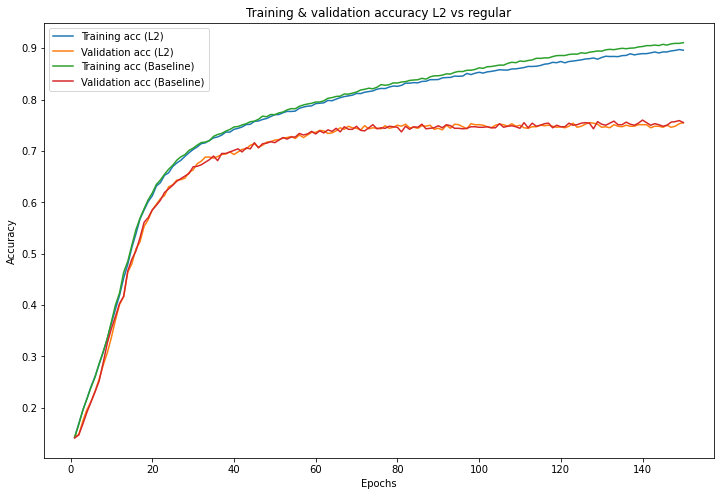

In [41]:
# L2 model details
L2_model_dict = L2_model_val.history
L2_acc_values = L2_model_dict['acc'] 
L2_val_acc_values = L2_model_dict['val_acc']

# Baseline model
baseline_model_acc = baseline_model_val_dict['acc'] 
baseline_model_val_acc = baseline_model_val_dict['val_acc']

# Plot the accuracy for these models
fig, ax = plt.subplots(figsize=(12, 8))
epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, L2_acc_values, label='Training acc (L2)')
ax.plot(epochs, L2_val_acc_values, label='Validation acc (L2)')
ax.plot(epochs, baseline_model_acc, label='Training acc (Baseline)')
ax.plot(epochs, baseline_model_val_acc, label='Validation acc (Baseline)')
ax.set_title('Training & validation accuracy L2 vs regular')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

The results of L2 regularization are quite disappointing here. Notice the discrepancy between validation and training accuracy seems to have decreased slightly, but the end result is definitely not getting better.  


## L1 Regularization

Now have a look at L1 regularization. Will this work better? 

- Use 2 hidden layers with 50 units in the first and 25 in the second layer, both with `'relu'` activation functions 
- Add L1 regularization to both the hidden layers with 0.005 as the `lambda_coeff` 

In [42]:
random.seed(123)
L1_model = models.Sequential()

# Add the input and first hidden layer
L1_model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,)))

# Add a hidden layer
L1_model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))

# Add an output layer
L1_model.add(layers.Dense(7, activation='softmax'))

# Compile the model
L1_model.compile(optimizer='SGD', 
                 loss='categorical_crossentropy', 
                 metrics=['acc'])

# Train the model 
L1_model_val = L1_model.fit(X_train_tokens, 
                            y_train_lb, 
                            epochs=150, 
                            batch_size=256, 
                            validation_data=(X_val_tokens, y_val_lb))

Epoch 1/150
30/30 [==============================] - 0s 8ms/step - loss: 16.0184 - acc: 0.1423 - val_loss: 15.6249 - val_acc: 0.1400
Epoch 2/150
30/30 [==============================] - 0s 4ms/step - loss: 15.2625 - acc: 0.1699 - val_loss: 14.8830 - val_acc: 0.1470
Epoch 3/150
30/30 [==============================] - 0s 4ms/step - loss: 14.5316 - acc: 0.1972 - val_loss: 14.1638 - val_acc: 0.1740
Epoch 4/150
30/30 [==============================] - 0s 4ms/step - loss: 13.8218 - acc: 0.2215 - val_loss: 13.4655 - val_acc: 0.2000
Epoch 5/150
30/30 [==============================] - 0s 5ms/step - loss: 13.1315 - acc: 0.2385 - val_loss: 12.7864 - val_acc: 0.2180
Epoch 6/150
30/30 [==============================] - 0s 5ms/step - loss: 12.4604 - acc: 0.2623 - val_loss: 12.1257 - val_acc: 0.2350
Epoch 7/150
30/30 [==============================] - 0s 5ms/step - loss: 11.8088 - acc: 0.2871 - val_loss: 11.4847 - val_acc: 0.2610
Epoch 8/150
30/30 [==============================] - 0s 5ms/step - lo

Epoch 63/150
30/30 [==============================] - 0s 5ms/step - loss: 1.7267 - acc: 0.6784 - val_loss: 1.7279 - val_acc: 0.6690
Epoch 64/150
30/30 [==============================] - 0s 5ms/step - loss: 1.7174 - acc: 0.6780 - val_loss: 1.7207 - val_acc: 0.6750
Epoch 65/150
30/30 [==============================] - 0s 4ms/step - loss: 1.7073 - acc: 0.6779 - val_loss: 1.7098 - val_acc: 0.6750
Epoch 66/150
30/30 [==============================] - 0s 4ms/step - loss: 1.6983 - acc: 0.6816 - val_loss: 1.7088 - val_acc: 0.6680
Epoch 67/150
30/30 [==============================] - 0s 4ms/step - loss: 1.6892 - acc: 0.6807 - val_loss: 1.6923 - val_acc: 0.6730
Epoch 68/150
30/30 [==============================] - 0s 4ms/step - loss: 1.6800 - acc: 0.6828 - val_loss: 1.6830 - val_acc: 0.6740
Epoch 69/150
30/30 [==============================] - 0s 4ms/step - loss: 1.6710 - acc: 0.6815 - val_loss: 1.6731 - val_acc: 0.6760
Epoch 70/150
30/30 [==============================] - 0s 5ms/step - loss: 1.

Epoch 125/150
30/30 [==============================] - 0s 5ms/step - loss: 1.3064 - acc: 0.7111 - val_loss: 1.3145 - val_acc: 0.7030
Epoch 126/150
30/30 [==============================] - 0s 4ms/step - loss: 1.3020 - acc: 0.7129 - val_loss: 1.3103 - val_acc: 0.6980
Epoch 127/150
30/30 [==============================] - 0s 4ms/step - loss: 1.2968 - acc: 0.7139 - val_loss: 1.3058 - val_acc: 0.7010
Epoch 128/150
30/30 [==============================] - 0s 4ms/step - loss: 1.2922 - acc: 0.7140 - val_loss: 1.3022 - val_acc: 0.7030
Epoch 129/150
30/30 [==============================] - 0s 4ms/step - loss: 1.2878 - acc: 0.7159 - val_loss: 1.2989 - val_acc: 0.6990
Epoch 130/150
30/30 [==============================] - 0s 4ms/step - loss: 1.2837 - acc: 0.7144 - val_loss: 1.2903 - val_acc: 0.6960
Epoch 131/150
30/30 [==============================] - 0s 4ms/step - loss: 1.2787 - acc: 0.7129 - val_loss: 1.2894 - val_acc: 0.7010
Epoch 132/150
30/30 [==============================] - 0s 5ms/step - 

Plot the training as well as the validation accuracy for the L1 model:

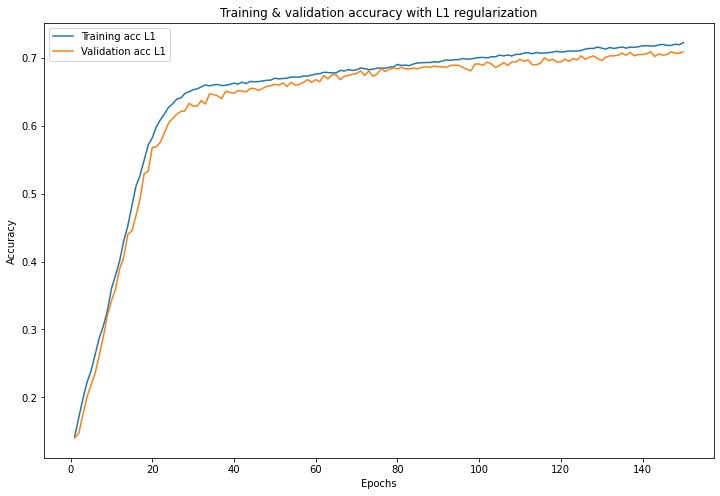

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

L1_model_dict = L1_model_val.history

acc_values = L1_model_dict['acc'] 
val_acc_values = L1_model_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc L1')
ax.plot(epochs, val_acc_values, label='Validation acc L1')
ax.set_title('Training & validation accuracy with L1 regularization')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

Notice how the training and validation accuracy don't diverge as much as before. Unfortunately, the validation accuracy isn't still that good. Next, experiment with dropout regularization to see if it offers any advantages. 


## Dropout Regularization 

It's time to try another technique: applying dropout to layers. As discussed in the earlier lesson, this involves setting a certain proportion of units in each layer to zero. In the following cell: 

- Apply a dropout rate of 30% to the input layer 
- Add a first hidden layer with 50 units and `'relu'` activation 
- Apply a dropout rate of 30% to the first hidden layer 
- Add a second hidden layer with 25 units and `'relu'` activation 
- Apply a dropout rate of 30% to the second hidden layer 

In [44]:
# ⏰ This cell may take about a minute to run
random.seed(123)
dropout_model = models.Sequential()

# Implement dropout to the input layer
# NOTE: This is where you define the number of units in the input layer
dropout_model.add(layers.Dropout(0.3, input_shape=(2000,)))

# Add the first hidden layer
dropout_model.add(layers.Dense(50, activation='relu'))

# Implement dropout to the first hidden layer 
dropout_model.add(layers.Dropout(0.3))

# Add the second hidden layer
dropout_model.add(layers.Dense(25, activation='relu'))

# Implement dropout to the second hidden layer 
dropout_model.add(layers.Dropout(0.3))

# Add the output layer
dropout_model.add(layers.Dense(7, activation='softmax'))


# Compile the model
dropout_model.compile(optimizer='SGD', 
                      loss='categorical_crossentropy', 
                      metrics=['acc'])

# Train the model
dropout_model_val = dropout_model.fit(X_train_tokens, 
                                      y_train_lb, 
                                      epochs=150, 
                                      batch_size=256, 
                                      validation_data=(X_val_tokens, y_val_lb))

Epoch 1/150
30/30 [==============================] - 1s 11ms/step - loss: 1.9930 - acc: 0.1396 - val_loss: 1.9577 - val_acc: 0.1430
Epoch 2/150
30/30 [==============================] - 0s 8ms/step - loss: 1.9633 - acc: 0.1553 - val_loss: 1.9478 - val_acc: 0.1550
Epoch 3/150
30/30 [==============================] - 0s 8ms/step - loss: 1.9521 - acc: 0.1587 - val_loss: 1.9406 - val_acc: 0.1710
Epoch 4/150
30/30 [==============================] - 0s 8ms/step - loss: 1.9462 - acc: 0.1719 - val_loss: 1.9348 - val_acc: 0.1860
Epoch 5/150
30/30 [==============================] - 0s 8ms/step - loss: 1.9358 - acc: 0.1825 - val_loss: 1.9299 - val_acc: 0.1900
Epoch 6/150
30/30 [==============================] - 0s 8ms/step - loss: 1.9309 - acc: 0.1893 - val_loss: 1.9249 - val_acc: 0.1970
Epoch 7/150
30/30 [==============================] - 0s 8ms/step - loss: 1.9252 - acc: 0.1988 - val_loss: 1.9196 - val_acc: 0.2050
Epoch 8/150
30/30 [==============================] - 0s 8ms/step - loss: 1.9192 - 

30/30 [==============================] - 0s 8ms/step - loss: 1.1828 - acc: 0.5605 - val_loss: 0.9342 - val_acc: 0.6810
Epoch 64/150
30/30 [==============================] - 0s 7ms/step - loss: 1.1697 - acc: 0.5652 - val_loss: 0.9258 - val_acc: 0.6820
Epoch 65/150
30/30 [==============================] - 0s 8ms/step - loss: 1.1557 - acc: 0.5657 - val_loss: 0.9157 - val_acc: 0.6820
Epoch 66/150
30/30 [==============================] - 0s 8ms/step - loss: 1.1530 - acc: 0.5723 - val_loss: 0.9091 - val_acc: 0.6810
Epoch 67/150
30/30 [==============================] - 0s 8ms/step - loss: 1.1410 - acc: 0.5720 - val_loss: 0.8994 - val_acc: 0.6870
Epoch 68/150
30/30 [==============================] - 0s 8ms/step - loss: 1.1548 - acc: 0.5676 - val_loss: 0.8956 - val_acc: 0.6810
Epoch 69/150
30/30 [==============================] - 0s 7ms/step - loss: 1.1324 - acc: 0.5783 - val_loss: 0.8867 - val_acc: 0.6860
Epoch 70/150
30/30 [==============================] - 0s 7ms/step - loss: 1.1356 - acc: 0

Epoch 125/150
30/30 [==============================] - 0s 7ms/step - loss: 0.9020 - acc: 0.6605 - val_loss: 0.6946 - val_acc: 0.7380
Epoch 126/150
30/30 [==============================] - 0s 8ms/step - loss: 0.8902 - acc: 0.6759 - val_loss: 0.6921 - val_acc: 0.7340
Epoch 127/150
30/30 [==============================] - 0s 8ms/step - loss: 0.8941 - acc: 0.6660 - val_loss: 0.6914 - val_acc: 0.7370
Epoch 128/150
30/30 [==============================] - 0s 7ms/step - loss: 0.8792 - acc: 0.6748 - val_loss: 0.6888 - val_acc: 0.7380
Epoch 129/150
30/30 [==============================] - 0s 7ms/step - loss: 0.8884 - acc: 0.6732 - val_loss: 0.6884 - val_acc: 0.7350
Epoch 130/150
30/30 [==============================] - 0s 8ms/step - loss: 0.8780 - acc: 0.6751 - val_loss: 0.6859 - val_acc: 0.7440
Epoch 131/150
30/30 [==============================] - 0s 7ms/step - loss: 0.8946 - acc: 0.6697 - val_loss: 0.6855 - val_acc: 0.7390
Epoch 132/150
30/30 [==============================] - 0s 7ms/step - 

In [45]:
results_train = dropout_model.evaluate(X_train_tokens, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = dropout_model.evaluate(X_test_tokens, y_test_lb)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')   

235/235 [==============================] - 0s 929us/step - loss: 0.5449 - acc: 0.8077
Training Loss: 0.545 
Training Accuracy: 0.808
----------
47/47 [==============================] - 0s 995us/step - loss: 0.6209 - acc: 0.7727
Test Loss: 0.621 
Test Accuracy: 0.773


You can see here that the validation performance has improved again, and the training and test accuracy are very close!  

## Bigger Data? 

Finally, let's examine if we can improve the model's performance just by adding more data. We've quadrapled the sample dataset from 10,000 to 40,000 observations, and all you need to do is run the code! 

In [46]:
df_bigger_sample = df.sample(40000, random_state=123)

X = df['Consumer complaint narrative']
y = df['Product']

# Train-test split
X_train_bigger, X_test_bigger, y_train_bigger, y_test_bigger = train_test_split(X, 
                                                                                y, 
                                                                                test_size=6000, 
                                                                                random_state=42)

# Validation set
X_train_final_bigger, X_val_bigger, y_train_final_bigger, y_val_bigger = train_test_split(X_train_bigger, 
                                                                                          y_train_bigger, 
                                                                                          test_size=4000, 
                                                                                          random_state=42)


# One-hot encoding of the complaints
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final_bigger)

X_train_tokens_bigger = tokenizer.texts_to_matrix(X_train_final_bigger, mode='binary')
X_val_tokens_bigger = tokenizer.texts_to_matrix(X_val_bigger, mode='binary')
X_test_tokens_bigger = tokenizer.texts_to_matrix(X_test_bigger, mode='binary')

# One-hot encoding of products
lb = LabelBinarizer()
lb.fit(y_train_final_bigger)

y_train_lb_bigger = to_categorical(lb.transform(y_train_final_bigger))[:, :, 1]
y_val_lb_bigger = to_categorical(lb.transform(y_val_bigger))[:, :, 1]
y_test_lb_bigger = to_categorical(lb.transform(y_test_bigger))[:, :, 1]

In [47]:
# ⏰ This cell may take several minutes to run
random.seed(123)
bigger_data_model = models.Sequential()
bigger_data_model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
bigger_data_model.add(layers.Dense(25, activation='relu'))
bigger_data_model.add(layers.Dense(7, activation='softmax'))

bigger_data_model.compile(optimizer='SGD', 
                          loss='categorical_crossentropy', 
                          metrics=['acc'])

bigger_data_model_val = bigger_data_model.fit(X_train_tokens_bigger,  
                                              y_train_lb_bigger,  
                                              epochs=150,  
                                              batch_size=256,  
                                              validation_data=(X_val_tokens_bigger, y_val_lb_bigger))

Epoch 1/150
196/196 [==============================] - 1s 5ms/step - loss: 1.9061 - acc: 0.2356 - val_loss: 1.8362 - val_acc: 0.3030
Epoch 2/150
196/196 [==============================] - 1s 4ms/step - loss: 1.7074 - acc: 0.3784 - val_loss: 1.5613 - val_acc: 0.4557
Epoch 3/150
196/196 [==============================] - 1s 4ms/step - loss: 1.3771 - acc: 0.5430 - val_loss: 1.2270 - val_acc: 0.6060
Epoch 4/150
196/196 [==============================] - 1s 4ms/step - loss: 1.0949 - acc: 0.6476 - val_loss: 1.0053 - val_acc: 0.6618
Epoch 5/150
196/196 [==============================] - 1s 4ms/step - loss: 0.9201 - acc: 0.6909 - val_loss: 0.8750 - val_acc: 0.6927
Epoch 6/150
196/196 [==============================] - 1s 4ms/step - loss: 0.8154 - acc: 0.7162 - val_loss: 0.7979 - val_acc: 0.7160
Epoch 7/150
196/196 [==============================] - 1s 4ms/step - loss: 0.7494 - acc: 0.7330 - val_loss: 0.7482 - val_acc: 0.7200
Epoch 8/150
196/196 [==============================] - 1s 4ms/step - 

196/196 [==============================] - 1s 4ms/step - loss: 0.3863 - acc: 0.8637 - val_loss: 0.5386 - val_acc: 0.8133
Epoch 63/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3846 - acc: 0.8650 - val_loss: 0.5466 - val_acc: 0.8123
Epoch 64/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3831 - acc: 0.8651 - val_loss: 0.5392 - val_acc: 0.8142
Epoch 65/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3814 - acc: 0.8655 - val_loss: 0.5483 - val_acc: 0.8098
Epoch 66/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3799 - acc: 0.8660 - val_loss: 0.5410 - val_acc: 0.8117
Epoch 67/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3782 - acc: 0.8665 - val_loss: 0.5431 - val_acc: 0.8108
Epoch 68/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3765 - acc: 0.8679 - val_loss: 0.5402 - val_acc: 0.8115
Epoch 69/150
196/196 [==============================] - 1s 4ms/step - loss:

196/196 [==============================] - 1s 4ms/step - loss: 0.3121 - acc: 0.8911 - val_loss: 0.5869 - val_acc: 0.8037
Epoch 124/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3108 - acc: 0.8921 - val_loss: 0.5752 - val_acc: 0.8073
Epoch 125/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3099 - acc: 0.8919 - val_loss: 0.5741 - val_acc: 0.8120
Epoch 126/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3086 - acc: 0.8932 - val_loss: 0.5802 - val_acc: 0.8080
Epoch 127/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3077 - acc: 0.8936 - val_loss: 0.5791 - val_acc: 0.8073
Epoch 128/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3065 - acc: 0.8935 - val_loss: 0.5811 - val_acc: 0.8105
Epoch 129/150
196/196 [==============================] - 1s 4ms/step - loss: 0.3057 - acc: 0.8939 - val_loss: 0.5776 - val_acc: 0.8092
Epoch 130/150
196/196 [==============================] - 1s 4ms/step 

In [48]:
results_train = bigger_data_model.evaluate(X_train_tokens_bigger, y_train_lb_bigger)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = bigger_data_model.evaluate(X_val_tokens_bigger, y_val_lb_bigger)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

1563/1563 [==============================] - 2s 1ms/step - loss: 0.2774 - acc: 0.9061
Training Loss: 0.277 
Training Accuracy: 0.906
----------
125/125 [==============================] - 0s 1ms/step - loss: 0.5934 - acc: 0.8098
Test Loss: 0.593 
Test Accuracy: 0.81


With the same amount of epochs and no regularization technique, you were able to get both better test accuracy and loss. You can still consider early stopping, L1, L2 and dropout here. It's clear that having more data has a strong impact on model performance! 

## Summary  

In this lesson, you built deep learning models using a validation set and used several techniques such as L2 and L1 regularization, dropout regularization, and early stopping to improve the accuracy of your models. 

## Additional Resources
* https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb

* https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

* https://catalog.data.gov/dataset/consumer-complaint-database 